### 1. 네이버 API로 블로그에서 '월드컵'에 대한 검색 결과를 크롤링하여 파일로 저장하는 프로그램을 작성하시오.

In [1]:
# architecture
# 네이버 open api에 요청 -> 검색 결과를 json 파일로 저장

client_id = 'Q_ZBQe8hknZaoRCQivJF'
client_secret = 'rCffqkIgDq'

In [7]:
encText = input()
encText = urllib.parse.quote(encText) # encoding

encText

'%EC%9B%94%EB%93%9C%EC%BB%B5'

In [8]:
start = 50000

base = 'https://openapi.naver.com/v1/search/blog?query='
url = base + encText +"&display=100&start=%d&sort=date" % 1000
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_secret)

NameError: name 'client_id' is not defined

In [7]:
response = urllib.request.urlopen(request)
response_body = response.read().decode('utf-8')

type(response_body)

str

In [8]:
naver_json = json.loads(response_body) # 문자열을 -> dict, list로 변환
print(naver_json['total'])
print(naver_json['items'])

2513032
[{'title': '[서울걷기] 화창한 가을날 북서울꿈의숲 산책, 장위기사식당... ', 'link': 'https://blog.naver.com/jejubaram2025/224058596271', 'description': '북서울꿈의숲 강북구에 있는 북서울꿈의숲은 드림랜드 부지에 조성된 녹지공원으로 <b>월드컵</b>공원, 올림픽공원에 이어 서울에서 세번째로 큰 공원이라고 합니다. 2009년 개장 초기에 한 번 와 봤는데, 어느덧... ', 'bloggername': '걷는여행과 책읽기_제주바람', 'bloggerlink': 'blog.naver.com/jejubaram2025', 'postdate': '20251030'}, {'title': '덕은지구 전세 수요 계절성·입주물량 영향 점검', 'link': 'https://blog.naver.com/sentenceydc/224058596079', 'description': '<b>월드컵</b> 경기장 내 홈플러스, 메가 박스, 쇼핑몰 등을 차량 5분 내로 사용할 수 자리수수행합니 다.... 가양 대교와 <b>월드컵</b>대교를 통해 올림픽대로 접근 성이 우수하며, 마곡, 여의도, 상암D MC 등 핵심... ', 'bloggername': 'sentenceydc님의 블로그', 'bloggerlink': 'blog.naver.com/sentenceydc', 'postdate': '20251030'}, {'title': '대전하나시티즌의 숨은 주역 이준서의 이야기', 'link': 'https://blog.naver.com/romantic_page/224058595798', 'description': '2015년 FIFA U17 <b>월드컵</b>에 출전하며 이름을 알렸고 이후 동국대학교에서 더욱 성장하였죠. 하지만 프로에 입단한 이후에는 주전 경쟁에서 어려움을 겪어야 했습니다. 2023 시즌에는 이창근과의 경쟁에서 밀려... ', 'bloggername': '델리카도', 'bloggerlink

In [46]:
total = naver_json['total']

news_list = naver_json['items']
naver_json

print(news_list)

# 100개 까지만 저장중 total 만큼 저장해야됨
with open('naver_crawling.json', 'w', encoding='utf-8') as f:
    json.dump(news_list, f, ensure_ascii=False, indent = 4)    

[{'title': '아현동 배열증, 치아 건강은 일상에서 지키세요', 'link': 'https://blog.naver.com/hankyungsinmun/224060181847', 'description': '대현동, 무악재역, 마포역, 합정역, 서교동, 서강동, <b>월드컵</b>경기장역, 홍제역, 서강대역, 서대문구, 성산동, 대신동, 신공덕동, 홍대입구역, 연희동, 신정동, 신공덕동, 북아현동, 도화동, 창천동 다양한 지역... ', 'bloggername': '이상훈 대표원장 - 북가좌경희한의원', 'bloggerlink': 'blog.naver.com/hankyungsinmun', 'postdate': '20251031'}, {'title': '암쏘큐리어스예~~ 사진 속 니가', 'link': 'https://blog.naver.com/lifeisjust9num/224060181821', 'description': '야구에 대해 아무것도 몰르는 ㅇㅅ랑 야선 이상형 <b>월드컵</b>도 함 야빠 아닌 사람이 하는 야선 얼평이 제일 웃김 진심 엄빠가 소금빵사옴 인생소금빵 ㄹㅈㄷ 아빠 이만큼 안아줄겨 (아빠=강민호) 다동 노들섬... ', 'bloggername': '그때 네가 나를 찾았지', 'bloggerlink': 'blog.naver.com/lifeisjust9num', 'postdate': '20251031'}, {'title': '홍대 설렁탕 맛집 푸주옥 홍대점', 'link': 'https://blog.naver.com/delica_day/224060173715', 'description': '☘️ 푸주옥 홍대점  주소 : 서울 마포구 <b>월드컵</b>북로 35 1층 ☘️ 영업시간 : 9시~21시  연락처 : 02 336 4635 급 쌀쌀해진 날씨에 뜨끈한 국밥 땡겨서 찾아간 설렁탕집 푸주옥 홍대점이 최근에 오픈했다 점심시간... ', 'bloggername': 'Delica_Day', 'bloggerlink': 'blog.naver.com

In [ ]:
base = 'https://openapi.naver.com/v1/search/blog?query='
news_list = []

for i in range(1, 1000, 100):
    url = base + encText +"&display=100&start=%d&sort=date" % i
        
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    response = urllib.request.urlopen(request)
    response_body = response.read().decode('utf-8')

    naver_json = json.loads(response_body) # 문자열을 -> dict, list로 변환

    # for j in range(len(naver_json['items'])):
    #     news_list.append(naver_json['items'][j]) # 현재 리스트
    news_list.extend(naver_json['items']) # 리스트 원소를 알아서 붙임
    
with open('naver_crawling.json', 'w', encoding='utf-8') as f:
    json.dump(news_list, f, ensure_ascii=False, indent = 4)    

-- 하나씩 dict넣는 예시 --
data1 = {"id": 1, "name": "Eddie"}
data2 = {"id": 2, "name": "Alice"}

with open("test.jsonl", "w", encoding="utf-8") as f:
    f.write(json.dumps(data1, ensure_ascii=False) + "\n")
    f.write(json.dumps(data2, ensure_ascii=False) + "\n")

### 2. 서울 열린 데이터 광장에서 공공데이터를 검색해 '자유제안'을 크롤링하여 파일로 저장하는 프로그램을 작성하시오

In [59]:
import requests
import json
import xml.dom.minidom

In [60]:
key = '506d4e6e51736b64383150517a4264'

In [61]:
start = 1
end = 5

base = 'http://openapi.seoul.go.kr:8088/'
uri = '%s/xml/ChunmanFreeSuggestions/%d/%d' %(key, start, end)

url = base+uri

In [62]:
response = requests.get(url)

In [63]:
response = response.content
response = response.decode('utf-8')


In [64]:
import xml.etree.ElementTree as ET

root = ET.fromstring(response)

count = root.find('list_total_count').text

In [65]:
print(count)

18285


In [ ]:
# 문자열 → DOM 객체
dom = xml.dom.minidom.parseString(response)

# 예쁘게 정렬된 문자열 (indent 적용됨)
pretty_xml = dom.toprettyxml(indent="    ")

with open('seoul_data.xml', 'w', encoding='utf-8') as f:
    f.write(pretty_xml)

In [ ]:
import requests
import json
import xml.dom.minidom
import xml.etree.ElementTree as ET

root = ET.fromstring(response)

count = root.find('list_total_count').text

key = '506d4e6e51736b64383150517a4264'

start = 1
end = 1000

base = 'http://openapi.seoul.go.kr:8088/'
uri = '%s/xml/ChunmanFreeSuggestions/%d/%d' %(key, start, end)

url = base+uri

response = requests.get(url)

response = response.content.decode('utf-8')

# 문자열 → DOM 객체
dom = xml.dom.minidom.parseString(response)

# 예쁘게 정렬된 문자열 (indent 적용됨)
pretty_xml = dom.toprettyxml(indent="    ")

with open('seoul_data.xml', 'w', encoding='utf-8') as f:
    f.write(pretty_xml)


In [67]:
import requests
import time
import xml.etree.ElementTree as ET
import xml.dom.minidom

key = '506d4e6e51736b64383150517a4264'
base = 'http://openapi.seoul.go.kr:8088/'
service = 'ChunmanFreeSuggestions'

# 1️⃣ 전체 개수 확인
url = f'{base}{key}/xml/{service}/1/1'
response = requests.get(url)
root = ET.fromstring(response.content.decode('utf-8'))
total_count = int(root.find('list_total_count').text)
print(f"전체 데이터 개수: {total_count}")

# 2️⃣ 루트 노드 생성 (최종 XML 통합용)
root_total = ET.Element(service)

# 3️⃣ 1000개씩 요청 반복
for start in range(1, total_count + 1, 1000):
    end = min(start + 999, total_count)
    url = f'{base}{key}/xml/{service}/{start}/{end}'
    response = requests.get(url)
    time.sleep(0.2)  # 서버 과부하 방지용 딜레이
    xml_str = response.content.decode('utf-8')
    
    # 현재 구간 XML 파싱
    try:
        chunk_root = ET.fromstring(xml_str)
    except ET.ParseError as e:
        continue

    # <row> 요소만 추출해서 전체 XML에 추가
    for row in chunk_root.findall('row'):
        root_total.append(row)

    print(f"{start}~{end} 완료 ({len(root_total)}건 누적)")

# 4️⃣ 전체 XML 문자열로 변환
xml_str = ET.tostring(root_total, encoding='utf-8')

# 5️⃣ 보기 좋게 정렬 (minidom으로 들여쓰기)
dom = xml.dom.minidom.parseString(xml_str)
pretty_xml = dom.toprettyxml(indent="    ")

# 6️⃣ 파일로 저장
with open('seoul_data.xml', 'w', encoding='utf-8') as f:
    f.write(pretty_xml)

print("✅ seoul_data.xml 저장 완료!")

전체 데이터 개수: 18285
1~1000 완료 (1000건 누적)
1001~2000 완료 (2000건 누적)
2001~3000 완료 (3000건 누적)
3001~4000 완료 (4000건 누적)
4001~5000 완료 (5000건 누적)
6001~7000 완료 (6000건 누적)
7001~8000 완료 (7000건 누적)
8001~9000 완료 (8000건 누적)
9001~10000 완료 (9000건 누적)
10001~11000 완료 (10000건 누적)
11001~12000 완료 (11000건 누적)
12001~13000 완료 (12000건 누적)
13001~14000 완료 (13000건 누적)
14001~15000 완료 (14000건 누적)
15001~16000 완료 (15000건 누적)
16001~17000 완료 (16000건 누적)
17001~18000 완료 (17000건 누적)
18001~18285 완료 (17285건 누적)
✅ seoul_data.xml 저장 완료!


### 3. 안전한 자전거 사용을 위해 자전거 사고 지역에 대한 안래를 제공하려고 한다. 자전거 사고 발생 지역에 대한 정보를 크롤링하여 csv파일에 저장하고 시각화하는 프로그램을 작성하시오.

공공데이터포털 에러로 인해 한국도로교통공단 api로 대체하였음

In [240]:
key = 'a8397ec56107bfaa5703edc7d1255a3146df523a8847655259f1bf75edf96fb3'

In [233]:
year = 2024

base = 'https://opendata.koroad.or.kr/data/'
uri = 'rest/frequentzone/bicycle?authkey=%s&searchYearCd=%d' %(key, year)

url = base+uri

In [7]:
import urllib.request

response = requests.get(url)

NameError: name 'requests' is not defined

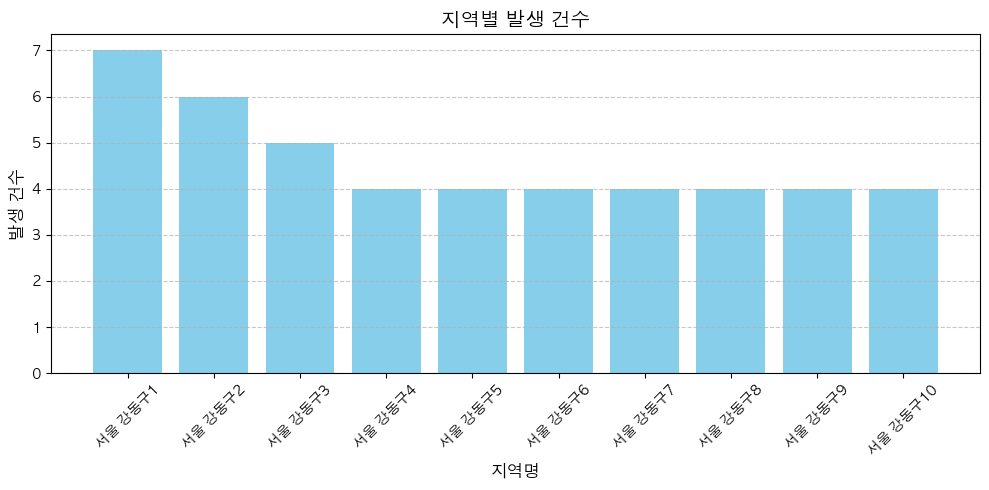

In [12]:
import urllib.request
import requests
import pandas as pd
import matplotlib.pyplot as plt
import platform
year = int(input("사고 년도 조회: "))
siDo = int(input("시 코드: "))
guGun = int(input('군/구 코드:'))

key = 'a8397ec56107bfaa5703edc7d1255a3146df523a8847655259f1bf75edf96fb3'

base = "https://apis.data.go.kr/B552061/frequentzoneBicycle/getRestFrequentzoneBicycle"

# params가 인코딩 해주기 떄문에 이중인코딩 문제 발생
params = {
    "ServiceKey": key,  # 반드시 원본 키
    "searchYearCd": year,
    "siDo": siDo,       # 서울
    "guGun": guGun,     # 강남구
    "type": "json",
    "numOfRows": '10',
    "pageNo": '1'
}


response = requests.get(base, params=params)

df = pd.DataFrame(response.json()['items']['item'])
df = df.loc[:,['sido_sgg_nm', 'occrrnc_cnt']]

system_name = platform.system()

if system_name == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif system_name == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux 등
    plt.rcParams['font.family'] = 'NanumGothic'

# ✅ 마이너스(-) 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 5))
plt.bar(df['sido_sgg_nm'], df['occrrnc_cnt'], color = 'skyblue')
plt.title('지역별 발생 건수', fontsize = 14)
plt.xlabel('지역명', fontsize = 12)
plt.ylabel('발생 건수', fontsize = 12)

plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()


### 4. 지역별 전기차의 충전기 수요 분석을 하려고 한다. 공공데이터포털의 오픈 api를 이용하여 지역별 전기 충전소 충전량 데이터와 지역별 전기차 충전수 개수 데이터를 크롤링하고 csv파일로 저장하는 프로그램을 작성하시오.

- 한국전력공사_전기차 충전소 설치현황
- 한국전력공사_전기차 충전소 충전량

In [140]:
import urllib.parse
import urllib.request

In [141]:
key = 'e1T6q1NWu4cmSjE98s1SM6V551NLQvS2M2OBmxHO'

In [142]:
base = 'https://bigdata.kepco.co.kr/openapi/v1/EVcharge.do'

In [160]:
params = {
    'metroCd' : '11',
    'apiKey': key,
    'returnType' : 'json'
}

In [161]:
response = requests.get(base, params=params)

In [162]:
data = response.content.decode('utf-8')

In [164]:
seoul_json = response.json()['data']

seoul_json

[{'metro': '서울특별시',
  'city': '강남구',
  'stnPlace': 'LH강남힐스테이트',
  'stnAddr': '서울특별시 강남구 자곡동 자곡로3길 21',
  'rapidCnt': 1,
  'slowCnt': 4,
  'carType': 'SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트EV,테슬라'},
 {'metro': '서울특별시',
  'city': '강남구',
  'stnPlace': 'LH서울지사',
  'stnAddr': '서울특별시 강남구 선릉로 121길 12',
  'rapidCnt': 1,
  'slowCnt': 0,
  'carType': 'SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트EV,테슬라'},
 {'metro': '서울특별시',
  'city': '강남구',
  'stnPlace': '가람아파트',
  'stnAddr': '서울특별시 강남구 일원동 일원로 127',
  'rapidCnt': 1,
  'slowCnt': 0,
  'carType': 'SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트EV,테슬라'},
 {'metro': '서울특별시',
  'city': '강남구',
  'stnPlace': '강남구청 공영주차장',
  'stnAddr': '서울특별시 강남구 삼성동 16-1',
  'rapidCnt': 1,
  'slowCnt': 0,
  'carType': 'SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트EV,테슬라'},
 {'metro': '서울특별시',
  'city': '강남구',
  'stnPlace': '강남데시앙파크',
  'stnAddr': '서울특별시 강남구 세곡동 헌릉로590길 63',
  'rapidCnt': 1,
  'slowCnt': 1,
  'carType': 'SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV

In [165]:
import pandas as pd

In [174]:
df = pd.DataFrame(seoul_json)

In [179]:
df.to_csv('fisrt.csv')

In [ ]:
import urllib.parse
import urllib.request
import pandas as pd

key = 'e1T6q1NWu4cmSjE98s1SM6V551NLQvS2M2OBmxHO'

base = 'https://bigdata.kepco.co.kr/openapi/v1/EVcharge.do'

#code = input("광역자치단체 코드 입력")

metro_list = ['11','21','22','23','24','25','26','31','32','33','34','35','36','37','38','39']

arr_total = []

for i in metro_list:
    params = {
        'metroCd': i,
        'apiKey': key,
        'returnType' : 'json',
    }

    response = requests.get(base, params=params)

    dict = {}

    print(response.json())

    arr = response.json()['data']


    total = 0

    for i in range(len(arr)):
        total = total + arr[i]['rapidCnt'] + arr[i]['slowCnt']

    dict['metro'] = arr[i]['metro']
    dict['total'] = total

    arr_total.append(dict)
    


{'data': [{'metro': '서울특별시', 'city': '강남구', 'stnPlace': 'LH강남힐스테이트', 'stnAddr': '서울특별시 강남구 자곡동 자곡로3길 21', 'rapidCnt': 1, 'slowCnt': 4, 'carType': 'SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트EV,테슬라'}, {'metro': '서울특별시', 'city': '강남구', 'stnPlace': 'LH서울지사', 'stnAddr': '서울특별시 강남구 선릉로 121길 12', 'rapidCnt': 1, 'slowCnt': 0, 'carType': 'SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트EV,테슬라'}, {'metro': '서울특별시', 'city': '강남구', 'stnPlace': '가람아파트', 'stnAddr': '서울특별시 강남구 일원동 일원로 127', 'rapidCnt': 1, 'slowCnt': 0, 'carType': 'SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트EV,테슬라'}, {'metro': '서울특별시', 'city': '강남구', 'stnPlace': '강남구청 공영주차장', 'stnAddr': '서울특별시 강남구 삼성동 16-1', 'rapidCnt': 1, 'slowCnt': 0, 'carType': 'SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트EV,테슬라'}, {'metro': '서울특별시', 'city': '강남구', 'stnPlace': '강남데시앙파크', 'stnAddr': '서울특별시 강남구 세곡동 헌릉로590길 63', 'rapidCnt': 1, 'slowCnt': 1, 'carType': 'SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트EV,테슬라'}, {'metro': '서울특별시', 'city': '강남구', 'stnPlac

In [ ]:
print(dict)

{'metro': '서울특별시', 'total': 1463}


In [228]:
df = pd.DataFrame(arr_total)

In [230]:
df.to_csv('total.csv')